In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The csv file contains 5172 rows, each row for each email. There are 3002 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files

In [2]:
df=pd.read_csv("emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.shape

(5172, 3002)

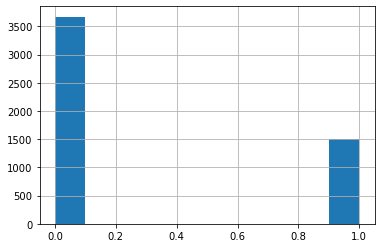

In [7]:
df["Prediction"].hist();

In [8]:
df.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

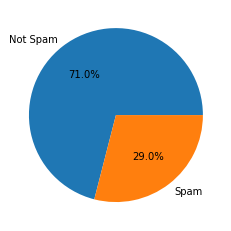

In [9]:
plt.pie(np.array(df['Prediction'].value_counts()), labels=['Not Spam',"Spam"], autopct='%1.1f%%')
plt.show()

In [10]:
df_final=df.drop("Email No.",axis=1)

In [11]:
X = df_final.drop("Prediction",axis=1)
y = df_final["Prediction"]

In [12]:
X.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [14]:
X.shape

(5172, 3000)

In [15]:
y.shape

(5172,)

In [16]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4137, 3000), (4137,), (1035, 3000), (1035,))

In [18]:
y_train.value_counts()

0    2933
1    1204
Name: Prediction, dtype: int64

In [19]:
y_test.value_counts()

0    739
1    296
Name: Prediction, dtype: int64

In [37]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=0.1, max_iter=1500.0, tol=0.001, random_state=42)
clf.fit(X_train,y_train)

C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.1, max_iter=1500.0, random_state=42, tol=0.001)

In [38]:
clf.score(X_test,y_test)

0.966183574879227

In [22]:
clf.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [23]:
np.array(y_test)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [24]:
y_preds= clf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.966183574879227

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_preds)

array([[717,  22],
       [ 13, 283]], dtype=int64)

In [27]:
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,717,22
1,13,283


<AxesSubplot:>

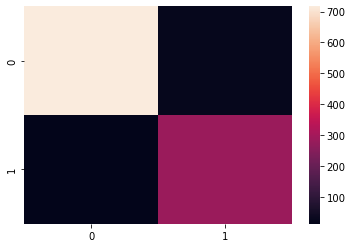

In [28]:
import seaborn as sns
conf_mat = confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat)

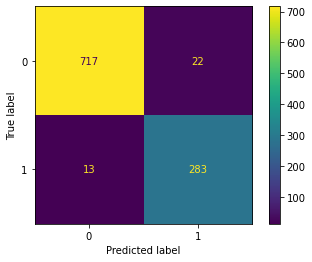

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X_test,y=y_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       739
           1       0.93      0.96      0.94       296

    accuracy                           0.97      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [31]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'max_iter': np.linspace(500,1500,3),
              'tol': [1e-3, 1e-2]} 
  
grid = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3)
  

In [32]:
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=0.1, max_iter=500.0, tol=0.001;, score=0.964 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=0.1, max_iter=500.0, tol=0.001;, score=0.961 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=0.1, max_iter=500.0, tol=0.001;, score=0.969 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=0.1, max_iter=500.0, tol=0.001;, score=0.949 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=0.1, max_iter=500.0, tol=0.001;, score=0.961 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=0.1, max_iter=500.0, tol=0.01;, score=0.966 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=0.1, max_iter=500.0, tol=0.01;, score=0.961 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=0.1, max_iter=500.0, tol=0.01;, score=0.967 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=0.1, max_iter=500.0, tol=0.01;, score=0.950 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=0.1, max_iter=500.0, tol=0.01;, score=0.960 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .C=0.1, max_iter=1000.0, tol=0.001;, score=0.967 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .C=0.1, max_iter=1000.0, tol=0.001;, score=0.965 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .C=0.1, max_iter=1000.0, tol=0.001;, score=0.969 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .C=0.1, max_iter=1000.0, tol=0.001;, score=0.949 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .C=0.1, max_iter=1000.0, tol=0.001;, score=0.963 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=0.1, max_iter=1000.0, tol=0.01;, score=0.966 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=0.1, max_iter=1000.0, tol=0.01;, score=0.965 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=0.1, max_iter=1000.0, tol=0.01;, score=0.969 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=0.1, max_iter=1000.0, tol=0.01;, score=0.950 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=0.1, max_iter=1000.0, tol=0.01;, score=0.961 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .C=0.1, max_iter=1500.0, tol=0.001;, score=0.970 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .C=0.1, max_iter=1500.0, tol=0.001;, score=0.965 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .C=0.1, max_iter=1500.0, tol=0.001;, score=0.969 total time=   0.9s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .C=0.1, max_iter=1500.0, tol=0.001;, score=0.949 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .C=0.1, max_iter=1500.0, tol=0.001;, score=0.963 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=0.1, max_iter=1500.0, tol=0.01;, score=0.970 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=0.1, max_iter=1500.0, tol=0.01;, score=0.966 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=0.1, max_iter=1500.0, tol=0.01;, score=0.967 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=0.1, max_iter=1500.0, tol=0.01;, score=0.949 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=0.1, max_iter=1500.0, tol=0.01;, score=0.963 total time=   0.9s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ....C=1, max_iter=500.0, tol=0.001;, score=0.959 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ....C=1, max_iter=500.0, tol=0.001;, score=0.964 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ....C=1, max_iter=500.0, tol=0.001;, score=0.964 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ....C=1, max_iter=500.0, tol=0.001;, score=0.938 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ....C=1, max_iter=500.0, tol=0.001;, score=0.958 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .....C=1, max_iter=500.0, tol=0.01;, score=0.964 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .....C=1, max_iter=500.0, tol=0.01;, score=0.964 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .....C=1, max_iter=500.0, tol=0.01;, score=0.963 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .....C=1, max_iter=500.0, tol=0.01;, score=0.938 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .....C=1, max_iter=500.0, tol=0.01;, score=0.955 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=1, max_iter=1000.0, tol=0.001;, score=0.965 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=1, max_iter=1000.0, tol=0.001;, score=0.964 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=1, max_iter=1000.0, tol=0.001;, score=0.961 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=1, max_iter=1000.0, tol=0.001;, score=0.940 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=1, max_iter=1000.0, tol=0.001;, score=0.954 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ....C=1, max_iter=1000.0, tol=0.01;, score=0.963 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ....C=1, max_iter=1000.0, tol=0.01;, score=0.964 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ....C=1, max_iter=1000.0, tol=0.01;, score=0.964 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ....C=1, max_iter=1000.0, tol=0.01;, score=0.941 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ....C=1, max_iter=1000.0, tol=0.01;, score=0.954 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=1, max_iter=1500.0, tol=0.001;, score=0.965 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=1, max_iter=1500.0, tol=0.001;, score=0.964 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=1, max_iter=1500.0, tol=0.001;, score=0.963 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=1, max_iter=1500.0, tol=0.001;, score=0.940 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=1, max_iter=1500.0, tol=0.001;, score=0.958 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ....C=1, max_iter=1500.0, tol=0.01;, score=0.965 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ....C=1, max_iter=1500.0, tol=0.01;, score=0.964 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ....C=1, max_iter=1500.0, tol=0.01;, score=0.964 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ....C=1, max_iter=1500.0, tol=0.01;, score=0.941 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ....C=1, max_iter=1500.0, tol=0.01;, score=0.958 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=10, max_iter=500.0, tol=0.001;, score=0.959 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=10, max_iter=500.0, tol=0.001;, score=0.961 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=10, max_iter=500.0, tol=0.001;, score=0.960 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=10, max_iter=500.0, tol=0.001;, score=0.937 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=10, max_iter=500.0, tol=0.001;, score=0.947 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ....C=10, max_iter=500.0, tol=0.01;, score=0.958 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ....C=10, max_iter=500.0, tol=0.01;, score=0.961 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ....C=10, max_iter=500.0, tol=0.01;, score=0.959 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ....C=10, max_iter=500.0, tol=0.01;, score=0.937 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ....C=10, max_iter=500.0, tol=0.01;, score=0.940 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=10, max_iter=1000.0, tol=0.001;, score=0.959 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=10, max_iter=1000.0, tol=0.001;, score=0.963 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=10, max_iter=1000.0, tol=0.001;, score=0.961 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=10, max_iter=1000.0, tol=0.001;, score=0.936 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=10, max_iter=1000.0, tol=0.001;, score=0.948 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=10, max_iter=1000.0, tol=0.01;, score=0.959 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=10, max_iter=1000.0, tol=0.01;, score=0.964 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=10, max_iter=1000.0, tol=0.01;, score=0.961 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=10, max_iter=1000.0, tol=0.01;, score=0.935 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=10, max_iter=1000.0, tol=0.01;, score=0.949 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=10, max_iter=1500.0, tol=0.001;, score=0.961 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=10, max_iter=1500.0, tol=0.001;, score=0.964 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=10, max_iter=1500.0, tol=0.001;, score=0.961 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=10, max_iter=1500.0, tol=0.001;, score=0.936 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=10, max_iter=1500.0, tol=0.001;, score=0.949 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=10, max_iter=1500.0, tol=0.01;, score=0.961 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=10, max_iter=1500.0, tol=0.01;, score=0.965 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=10, max_iter=1500.0, tol=0.01;, score=0.961 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=10, max_iter=1500.0, tol=0.01;, score=0.935 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=10, max_iter=1500.0, tol=0.01;, score=0.949 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=100, max_iter=500.0, tol=0.001;, score=0.960 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=100, max_iter=500.0, tol=0.001;, score=0.961 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=100, max_iter=500.0, tol=0.001;, score=0.960 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=100, max_iter=500.0, tol=0.001;, score=0.933 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=100, max_iter=500.0, tol=0.001;, score=0.942 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=100, max_iter=500.0, tol=0.01;, score=0.961 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=100, max_iter=500.0, tol=0.01;, score=0.961 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=100, max_iter=500.0, tol=0.01;, score=0.960 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=100, max_iter=500.0, tol=0.01;, score=0.932 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=100, max_iter=500.0, tol=0.01;, score=0.950 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .C=100, max_iter=1000.0, tol=0.001;, score=0.961 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .C=100, max_iter=1000.0, tol=0.001;, score=0.960 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .C=100, max_iter=1000.0, tol=0.001;, score=0.961 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .C=100, max_iter=1000.0, tol=0.001;, score=0.933 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .C=100, max_iter=1000.0, tol=0.001;, score=0.943 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=100, max_iter=1000.0, tol=0.01;, score=0.961 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=100, max_iter=1000.0, tol=0.01;, score=0.961 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=100, max_iter=1000.0, tol=0.01;, score=0.961 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=100, max_iter=1000.0, tol=0.01;, score=0.933 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=100, max_iter=1000.0, tol=0.01;, score=0.943 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .C=100, max_iter=1500.0, tol=0.001;, score=0.961 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .C=100, max_iter=1500.0, tol=0.001;, score=0.963 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .C=100, max_iter=1500.0, tol=0.001;, score=0.961 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .C=100, max_iter=1500.0, tol=0.001;, score=0.933 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .C=100, max_iter=1500.0, tol=0.001;, score=0.943 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=100, max_iter=1500.0, tol=0.01;, score=0.961 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=100, max_iter=1500.0, tol=0.01;, score=0.963 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=100, max_iter=1500.0, tol=0.01;, score=0.961 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=100, max_iter=1500.0, tol=0.01;, score=0.933 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=100, max_iter=1500.0, tol=0.01;, score=0.943 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .C=1000, max_iter=500.0, tol=0.001;, score=0.960 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .C=1000, max_iter=500.0, tol=0.001;, score=0.960 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .C=1000, max_iter=500.0, tol=0.001;, score=0.956 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .C=1000, max_iter=500.0, tol=0.001;, score=0.935 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .C=1000, max_iter=500.0, tol=0.001;, score=0.942 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=1000, max_iter=500.0, tol=0.01;, score=0.961 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=1000, max_iter=500.0, tol=0.01;, score=0.954 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=1000, max_iter=500.0, tol=0.01;, score=0.959 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=1000, max_iter=500.0, tol=0.01;, score=0.935 total time=   0.5s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=1000, max_iter=500.0, tol=0.01;, score=0.947 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1000, max_iter=1000.0, tol=0.001;, score=0.961 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1000, max_iter=1000.0, tol=0.001;, score=0.960 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1000, max_iter=1000.0, tol=0.001;, score=0.961 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1000, max_iter=1000.0, tol=0.001;, score=0.933 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1000, max_iter=1000.0, tol=0.001;, score=0.943 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .C=1000, max_iter=1000.0, tol=0.01;, score=0.961 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .C=1000, max_iter=1000.0, tol=0.01;, score=0.961 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .C=1000, max_iter=1000.0, tol=0.01;, score=0.961 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .C=1000, max_iter=1000.0, tol=0.01;, score=0.933 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .C=1000, max_iter=1000.0, tol=0.01;, score=0.942 total time=   0.6s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1000, max_iter=1500.0, tol=0.001;, score=0.963 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1000, max_iter=1500.0, tol=0.001;, score=0.963 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1000, max_iter=1500.0, tol=0.001;, score=0.961 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1000, max_iter=1500.0, tol=0.001;, score=0.933 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1000, max_iter=1500.0, tol=0.001;, score=0.944 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .C=1000, max_iter=1500.0, tol=0.01;, score=0.963 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .C=1000, max_iter=1500.0, tol=0.01;, score=0.963 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .C=1000, max_iter=1500.0, tol=0.01;, score=0.961 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .C=1000, max_iter=1500.0, tol=0.01;, score=0.935 total time=   0.7s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .C=1000, max_iter=1500.0, tol=0.01;, score=0.944 total time=   0.8s


C:\Users\SUR\Desktop\heart-disease\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'max_iter': array([ 500., 1000., 1500.]),
                         'tol': [0.001, 0.01]},
             verbose=3)

In [33]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 0.1, 'max_iter': 1500.0, 'tol': 0.001}


In [34]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

LinearSVC(C=0.1, max_iter=1500.0, tol=0.001)


In [35]:
grid_predictions = grid.predict(X_test)

In [36]:
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       739
           1       0.93      0.96      0.94       296

    accuracy                           0.97      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [39]:
# save the model to disk
import pickle
filename = 'spam-LSVC.sav'
pickle.dump(clf, open(filename, 'wb'))